In [52]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (25000,)
y_train.shape: (25000,)
X_test.shape: (25000,)
y_test.shape: (25000,)


In [53]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

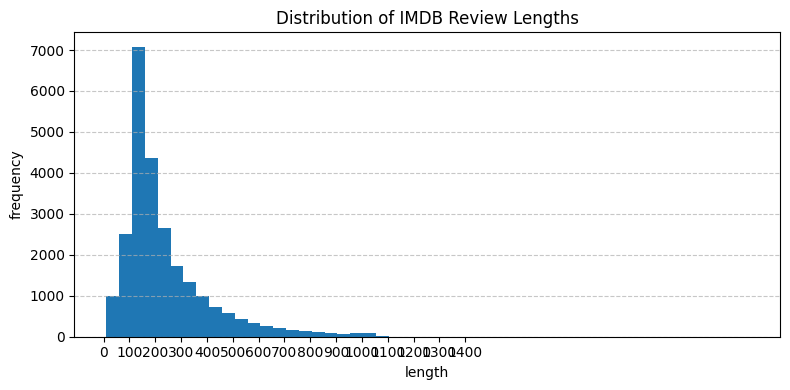

In [58]:
import matplotlib.pyplot as plt
import numpy as np

lengths = np.array([len(x) for x in X_train])

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
plt.hist(lengths, bins=50)
plt.xlabel('length')
plt.ylabel('frequency')
plt.xticks(np.arange(0, 1500, 100))  # y축을 1,000 단위로 표시
plt.title('Distribution of IMDB Review Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [42]:
for i in range(10):
  print(len(X_train[i]))

218
189
141
550
147
43
123
562
233
130


In [43]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [44]:
for i in range(10):
  print(len(X_train[i]))

200
200
200
200
200
200
200
200
200
200


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim = num_words, output_dim = 64, input_length = max_len),
    SimpleRNN(units = 32),
    Dense(1, activation = 'sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.6044 - loss: 0.6528 - val_accuracy: 0.7692 - val_loss: 0.5018
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7981 - loss: 0.4488 - val_accuracy: 0.8128 - val_loss: 0.4369
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8925 - loss: 0.2736 - val_accuracy: 0.8286 - val_loss: 0.4107
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9362 - loss: 0.1891 - val_accuracy: 0.8182 - val_loss: 0.4686
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9895 - loss: 0.0517 - val_accuracy: 0.8202 - val_loss: 0.5200


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,929,413 (7.36 MB)

 Trainable params: 643,137 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286,276 (4.91 MB)

In [48]:
loss, acc = model.evaluate(X_test, y_test)
print(f'test loss and acc : {loss, acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8240 - loss: 0.5076
test loss and acc : (0.5026150345802307, 0.8277599811553955)


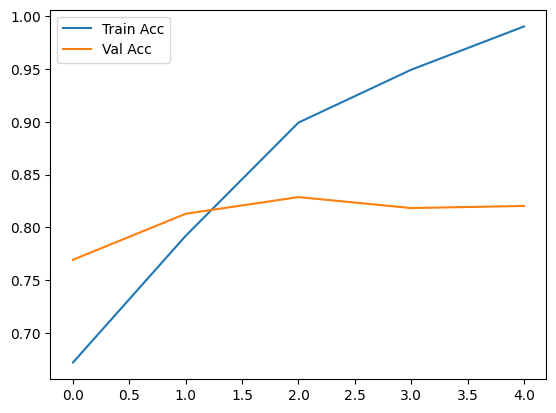

In [59]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

In [61]:
history.history

{'accuracy': [0.6718500256538391,
  0.791949987411499,
  0.8992000222206116,
  0.9492999911308289,
  0.9902999997138977],
 'loss': [0.6057147979736328,
  0.45262691378593445,
  0.2559875547885895,
  0.15306591987609863,
  0.04586464911699295],
 'val_accuracy': [0.7692000269889832,
  0.8127999901771545,
  0.8285999894142151,
  0.8181999921798706,
  0.8202000260353088],
 'val_loss': [0.5018163323402405,
  0.4368973672389984,
  0.41070762276649475,
  0.4686492681503296,
  0.5200129151344299]}